# Generating graph data

In [58]:
import networkx as nx
import numpy as np
from matplotlib import pyplot as plt
from ipywidgets import interactive

## Graph generator

In [177]:
def generate_graph(num_nodes, num_clusters, num_features, dist_params, p, q):
    """
    Method to generate a graph with clusters, where different distributions generate node attributes
    
    Params:
        num_nodes: Total nodes in the graph (int)
        num_clusters: Number of clusters in the graph (int)
        num_features: Length/dimensionality of node attribute vectors (int)
        dist_params: The parameters of the distributions for each clsuter. List of length num_clusters with (μ, σ) tuple
        p: Intra-cluster edge probability
        q: Inter-cluster edge probability
    """
    # init
    g = nx.empty_graph()
    A = np.zeros((num_nodes, num_nodes))

    # randomly assign clusters
    clusters = {
        i : np.random.choice(np.arange(num_clusters)) 
        for i in range(num_nodes)
    }

    # use corresponding distributions to generate attributes
    node_attrs = {
        i: np.random.normal(loc=dist_params[c][0], scale=dist_params[c][1], size=num_features)
        for i, c in clusters.items()
    }

    for i in range(num_nodes):
        for j in range(num_nodes):
            if i!=j:
                # same cluster
                if clusters[i] == clusters[j]:
                    A[i][j] = np.random.normal(p, 0.2)
                # different cluster
                else: 
                    A[i][j] = np.random.normal(q, 0.2)

    A = np.int32(A > 0.5) # threshold adjacency

    g = nx.from_numpy_array(A)
    nx.set_node_attributes(g, node_attrs, 'x')

    return g, clusters

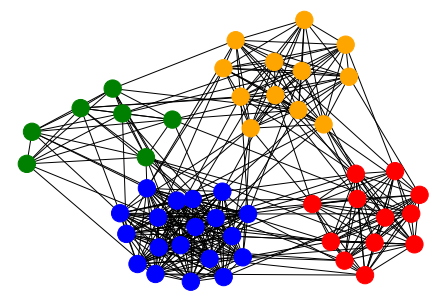

In [181]:
dist_params = [
    (5, 0.9),
    (3, 0.4),
    (-1, 0.5),
    (0,0.1)
]

G, clusters = generate_graph(
        num_nodes=50,
        num_clusters=4,
        num_features=10,
        dist_params=dist_params,
        p=0.8,
        q=0.15
    )

colours = ['red', 'blue', 'green', 'orange', 'pink', 'yellow', 'gray']
nx.draw(G, node_color=[colours[c] for c in clusters.values()])

In [187]:
nx.adjacency_matrix(G)

<50x50 sparse matrix of type '<class 'numpy.longlong'>'
	with 808 stored elements in Compressed Sparse Row format>

In [12]:
def f(n,k):
    g = nx.windmill_graph(n,k)
    nx.draw(g)
    plt.show()
    
interactive_plot = interactive(f, n=(0,25), k=(1,7))
interactive_plot

interactive(children=(IntSlider(value=12, description='n', max=25), IntSlider(value=4, description='k', max=7,…